# Final Project

## Dataset : Music & Mental Health Survey Results

------------------------------------------------------------------------------------------------------
The dataset was extracted in kaggle, and the data collection was managed by Catherine Rasgaitis, through a form with generic questions regarding musical background and listening habits and mental health symptoms.

Columns:
- Timestamp - Date and time when form was submitted
- Age - Respondent's age 
- Primary streaming service - Respondent's primary streaming service
- Hours per day - Number of hours the respondent listens to music per day
- While working - Does the respondent listen to music while 
- Instrumentalist - Does the respondent play an instrument regularly?
- Composer - Does the respondent compose music?
- Fav genre - Respondent's favorite or top genre
- Exploratory - Does the respondent actively explore new artists/genres?
- Foreign languages - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM - Beats per minute of favorite genre
- Frequency [Classical] - How frequently the respondent listens to classical music
- Frequency [Country] - How frequently the respondent listens to country music
- Frequency [EDM] - How frequently the respondent listens to EDM music
- Frequency [Folk] - How frequently the respondent listens to folks music
- Frequency [Gospel] - How frequently the respondent listens to Gospel music
- Frequency [Hip hop] - How frequently the respondent listens to hip hop music
- Frequency [Jazz] - How frequently the respondent listens to jazz music
- Frequency [K pop] - How frequently the respondent listens to K pop music
- Frequency [Latin] - How frequently the respondent listens to Latin music
- Frequency [Lofi] - How frequently the respondent listens to lofi music
- Frequency [Metal] - How frequently the respondent listens to metal music
- Frequency [Pop] - How frequently the respondent listens to pop music
- Frequency [R&B] - How frequently the respondent listens to R&B music
- Frequency [Rap] - How frequently the respondent listens to rap music
- Frequency [Rock] - How frequently the respondent listens to rock music
- Frequency [Video game music] - How frequently the respondent listens to video game music
- Anxiety - Self-reported anxiety, on a scale of 0-10
- Depression - Self-reported depression, on a scale of 0-10
- Insomnia - Self-reported insomnia, on a scale of 0-10
- OCD - Self-reported OCD, on a scale of 0-10
- Music effects - Does music improve/worsen respondent's mental health conditions?
- Permissions - Permissions to publicize data

kaggle link: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

-----------------------------------------------------------------------------------------------------

## Objective

--------------------------------------------------------------------------------------------------------
The goal here is to identify correlations between a person's music taste or relationship with music and its mental health. And additionaly to predict if an individuals music preference can influence their mental health status.

-------------------------------------------------------------------------------------------------------

## Confirmatory Data Analysis (CDA)

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the cleaned 'Music & Mental Health Survey Results' dataset
df = pd.read_csv('archive\survey_results_cleaned.csv', encoding="latin1", sep= ",")
df.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_pop,freq_r&b,freq_rap,freq_rock,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects
0,18,Spotify,3,Yes,Yes,Yes,Latin,Yes,Yes,156,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,No effect
1,63,Pandora,1,Yes,No,No,Rock,Yes,No,119,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,No effect
2,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
3,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
4,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve


### 1. Hypothesis Testing

---------------------------------------------------------------------------------------------------------------------------------------------------
Let's perform a Analysis of Variance (ANOVA) to compare the means of the 4 mental health issues in question across various different music genres (using column fav_genre).

---------------------------------------------------------------------------------------------------------------------------------------------------

###### Depression

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['depression'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country   0.2445    1.0 -2.2599  2.749  False
Classical              EDM   1.1678 0.9103 -1.0436 3.3791  False
Classical             Folk   0.9912 0.9877 -1.3672 3.3496  False
Classical           Gospel  -1.4088 0.9994  -5.855 3.0374  False
Classical          Hip hop   1.8069 0.3077 -0.4612  4.075  False
Classical             Jazz   0.4245    1.0 -2.2843 3.1334  False
Classical            K pop   0.3476    1.0 -2.1239 2.8191  False
Classical            Latin  -1.0755    1.0 -7.2014 5.0504  False
Classical             Lofi   2.5245 0.5186 -1.0343 6.0834  False
Classical            Metal   0.9927 0.8747  -0.802 2.7875  False
Classical              Pop    0.407    1.0 -1.3091 2.1231  False
Classical              R&B  -0.2469    1.0 -2.4952 2.0014  False
Classical              Ra

-------------------------------------------------------------------------------------------------------------------------
For all music genre combinatios, the null cannot be rejected. Meaning, for example:
- Given a p-adj value of 1.0 and a reject value of False, we would conclude that there's no statistically significant difference in the mean value of the measured variable (depression) between individuals who prefer Classical music and those who prefer Country music based on this test. The wide confidence interval that includes both positive and negative values further underscores the uncertainty around this meandiff estimate, suggesting that any observed difference could be due to chance.

- In summary, this particular comparison does not provide evidence to support a difference in means between the Classical and Country groups for the variable in question under the conditions of this study.

------------------------------------------------------------------------------------------------------------------------

###### Anxiety

In [4]:
# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['anxiety'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country   0.5132    1.0 -1.8106  2.837  False
Classical              EDM   0.5997 0.9998 -1.4522 2.6516  False
Classical             Folk   1.6799 0.3727 -0.5084 3.8682  False
Classical           Gospel  -0.0535    1.0  -4.179 4.0721  False
Classical          Hip hop   1.2309 0.8187 -0.8736 3.3354  False
Classical             Jazz   1.0132 0.9919 -1.5003 3.5267  False
Classical            K pop    1.344 0.8164 -0.9493 3.6372  False
Classical            Latin  -0.5535    1.0 -6.2376 5.1306  False
Classical             Lofi   1.2132  0.997  -2.089 4.5154  False
Classical            Metal   0.8746  0.914 -0.7907 2.5399  False
Classical              Pop   1.1834 0.4321  -0.409 2.7757  False
Classical              R&B   0.2846    1.0 -1.8015 2.3707  False
Classical              Ra

-------------------------------------------------------------------------------------------------------------------
Again, we cannot reject the null hypothesis for any of the above combinations.

Thereby, there is no evidence to support that a difference of means of anxiety scores for each two different music genre combination.

--------------------------------------------------------------------------------------------------------------------
    

###### Insomnia

In [5]:
# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['insomnia'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country  -1.0725 0.9881 -3.6327 1.4878  False
Classical              EDM   0.1805    1.0 -2.0801 2.4411  False
Classical             Folk  -0.1591    1.0   -2.57 2.2518  False
Classical           Gospel   1.5409 0.9988 -3.0043 6.0861  False
Classical          Hip hop  -0.3219    1.0 -2.6404 1.9967  False
Classical             Jazz   0.0575    1.0 -2.7116 2.8267  False
Classical            K pop  -0.3309    1.0 -2.8575 2.1956  False
Classical            Latin  -0.4591    1.0 -6.7214 5.8032  False
Classical             Lofi   1.8075 0.9444 -1.8305 5.4456  False
Classical            Metal   0.7644 0.9887 -1.0704 2.5991  False
Classical              Pop   -0.424    1.0 -2.1783 1.3303  False
Classical              R&B  -0.9067 0.9935 -3.2051 1.3916  False
Classical              Ra

-------------------------------------------------------------------------------------------------------------------
Again, we cannot reject the null hypothesis for any of the above combinations.

Thereby, there is no evidence to support that a difference of means of insomnia scores for each two different music genre combination.

--------------------------------------------------------------------------------------------------------------------

###### OCD

In [6]:
# Assuming a significant ANOVA result, conducting post hoc analysis
post_hoc = pairwise_tukeyhsd(endog=df['ocd'], groups=df['fav_genre'], alpha=0.05)

print(post_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower  upper  reject
----------------------------------------------------------------
Classical          Country   0.3826    1.0 -1.9935 2.7588  False
Classical              EDM   0.6226 0.9997 -1.4754 2.7207  False
Classical             Folk  -0.1774    1.0 -2.4149 2.0602  False
Classical           Gospel   -2.044 0.9548 -6.2625 2.1744  False
Classical          Hip hop   0.2109    1.0  -1.941 2.3628  False
Classical             Jazz   0.4226    1.0 -2.1474 2.9927  False
Classical            K pop   0.1611    1.0 -2.1838  2.506  False
Classical            Latin  -0.7107    1.0 -6.5228 5.1014  False
Classical             Lofi   1.0226 0.9997 -2.3539 4.3992  False
Classical            Metal   0.0204    1.0 -1.6825 1.7232  False
Classical              Pop   0.4735 0.9998 -1.1547 2.1017  False
Classical              R&B   0.3655    1.0 -1.7676 2.4986  False
Classical              Ra

-------------------------------------------------------------------------------------------------------------------
Again, we cannot reject the null hypothesis for any of the above combinations.

Thereby, there is no evidence to support that a difference of means of OCD scores for each two different music genre combination.

--------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Let's perform a Analysis of Variance (ANOVA) to compare the means of the 4 mental health issues in question and being an Instrumentalist or not.

---------------------------------------------------------------------------------------------------------

###### Anxiety

In [7]:
from scipy import stats

group1 = df[df['instrumentalist'] == 'Yes']['anxiety']
group2 = df[df['instrumentalist'] == 'No']['anxiety']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.7738358046772896
P-value: 0.43927739634028684


-----------------------------------------------------------------------------------------------------------------------------------------
Given the T-Statistic and P-value:

- The difference in anxiety scores between instrumentalists and non-instrumentalists is not statistically significant. This implies that being an instrumentalist, based on this analysis, does not significantly affect anxiety scores – at least not in a manner detectable by this test in our specific dataset.
- The high p-value suggests that there is a high likelihood of observing our results, or more extreme, purely by chance if there were actually no difference in anxiety levels between the two groups in the overall population.

---------------------------------------------------------------------------------------------------------------------

###### Depression

In [8]:
group1 = df[df['instrumentalist'] == 'Yes']['depression']
group2 = df[df['instrumentalist'] == 'No']['depression']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.1470619642582085
P-value: 0.8831235502321964


-----------------------------------------------------------------------------------------------------------------------------------------
Given the T-Statistic and P-value:

- The difference in depression scores between instrumentalists and non-instrumentalists is not statistically significant. This implies that being an instrumentalist, based on this analysis, does not significantly affect depression scores – at least not in a manner detectable by this test in our specific dataset.
- The high p-value suggests that there is a high likelihood of observing our results, or more extreme, purely by chance if there were actually no difference in depression levels between the two groups in the overall population.

---------------------------------------------------------------------------------------------------------------------

###### Insomnia

In [9]:
group1 = df[df['instrumentalist'] == 'Yes']['insomnia']
group2 = df[df['instrumentalist'] == 'No']['insomnia']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.6669253836818174
P-value: 0.5050296729577414


-------------------------------------------------------------------------------------------
The same thing referred for anxiety and depression scroes applies to the insomnia scores: being an instrumentalist, based on this analysis, does not significantly affect insomnia scores

-----------------------------------------------------------------------------------------------------------------------

###### OCD

In [10]:
group1 = df[df['instrumentalist'] == 'Yes']['ocd']
group2 = df[df['instrumentalist'] == 'No']['ocd']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 0.4169308354715007
P-value: 0.6768510695587053


--------------------------------------
Again, given the results, this implies that being an instrumentalist, based on this analysis, does not significantly affect OCD scores.


---------------------------------------------------------------------------------------


### 2. Regression Analysis

##### 2.1 Linear Regression

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
We'll be using Linear Regression to predict a continuous mental health score (depression, anxiety, insomnia and OCD) from various music preferences or genres (fav_genre)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
# One-hot encode 'fav_genre'
df_encoded = pd.get_dummies(df, columns=['fav_genre'], drop_first=True)

df_encoded.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,exploratory,foreign_languages,bpm,freq_classical,...,fav_genre_Jazz,fav_genre_K pop,fav_genre_Latin,fav_genre_Lofi,fav_genre_Metal,fav_genre_Pop,fav_genre_R&B,fav_genre_Rap,fav_genre_Rock,fav_genre_Video game music
0,18,Spotify,3,Yes,Yes,Yes,Yes,Yes,156,Rarely,...,False,False,True,False,False,False,False,False,False,False
1,63,Pandora,1,Yes,No,No,Yes,No,119,Sometimes,...,False,False,False,False,False,False,False,False,True,False
2,18,Spotify,4,No,No,No,No,Yes,132,Never,...,False,False,False,False,False,False,False,False,False,True
3,61,YouTube Music,2,Yes,No,Yes,Yes,Yes,84,Sometimes,...,True,False,False,False,False,False,False,False,False,False
4,18,Spotify,4,Yes,No,No,Yes,No,107,Never,...,False,False,False,False,False,False,True,False,False,False


In [12]:
# Step 1: Drop specific target columns to create a temporary DataFrame that still holds potential categorical columns
temp_features = df_encoded.drop(['depression', 'anxiety', 'insomnia', 'ocd'], axis=1)

# Step 2: Select only numerical columns from temp_features. This keeps one-hot encoded and numerical while dropping original categoricals.
X = temp_features.select_dtypes(include=['number'])


###### Depression

In [13]:
# Extracting the target variable remains the same
y = df_encoded['depression']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 8.189487122890394
R-squared: 0.021786613977609726


---------------------------------------------------------------------------------------------------------------------------------------
- A MSE of 8.178 indicates that, on average, the square of the difference between observed and predicted values in our model is 8.178. The smaller the MSE, the closer your model's predictions are to the actual values, indicating a better fit.

-  An R² value of approximately 0.022 suggests that about 2.2% of the variance in our dependent variable (depression) can be explained by our model. Given that R² ranges from 0 to 1, where 1 indicates a perfect fit, a value as low as 0.022 implies that our model does not explain much of the variance in the target variable, suggesting that the model has a weak predictive capability in its current form.

----------------------------------------------------------------------------------------------------------------------------------------

###### Anxiety

In [15]:
# Extracting the target variable remains the same
y = df_encoded['anxiety']

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 7.933583028830864
R-squared: -0.06538066860974756


-------------------------------------------------------------------------------------------
Again we didn't get good results, which means that our model has a weak predictive capability for anxiety scores too.

-------------------------------------------------------------------------------------------

###### Insomnia

In [17]:
# Extracting the target variable remains the same
y = df_encoded['insomnia']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 8.555303008059765
R-squared: -0.03900109424478715


-------------------------------------------------------------------------------------------
Again we didn't get good results, which means that our model has a weak predictive capability for insomnia scores too.

-------------------------------------------------------------------------------------------

###### OCD

In [19]:
# Extracting the target variable remains the same
y = df_encoded['ocd']

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 9.754342882017578
R-squared: -0.005061965179848693


-------------------------------------------------------------------------------------------
Again we didn't get good results, which means that our model has a weak predictive capability for OCD scores too.

-------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------
Let's test it **without outliers** to see if we get a better model.

---------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
# Initialize a mask with False for all rows
outlier_mask_iqr = pd.Series(data=False, index=df.index)

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Update mask for any outliers in the column
    outlier_mask_iqr |= (df[column] < lower_bound) | (df[column] > upper_bound)

In [22]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
df_z_scores = pd.DataFrame(z_scores, columns=df.columns)

# Initialize a mask with False
outlier_mask_z = pd.Series(data=False, index=df.index)

for column in df_z_scores.columns:
    # Update mask for any outliers in the column (Z-score > 3)
    outlier_mask_z |= (df_z_scores[column] > 3)

In [24]:
# Combine the masks (logical 'or')
final_outlier_mask = outlier_mask_iqr | outlier_mask_z

# Remove outliers based on the combined mask
df_no_outliers = df[~final_outlier_mask]  # The '~' negates the mask to keep non-outliers

print(f"Original DataFrame had {df.shape[0]} rows.")
print(f"DataFrame after removing outliers has {df_no_outliers.shape[0]} rows.")

Original DataFrame had 735 rows.
DataFrame after removing outliers has 625 rows.


In [25]:
df_no_outliers

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_pop,freq_r&b,freq_rap,freq_rock,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects
0,18,Spotify,3,Yes,Yes,Yes,Latin,Yes,Yes,156,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,No effect
2,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
4,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
5,18,Spotify,5,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
6,18,YouTube Music,3,Yes,Yes,No,Video game music,Yes,Yes,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,17,Spotify,2,Yes,Yes,No,Rock,Yes,Yes,120,...,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
731,18,Spotify,1,Yes,Yes,No,Pop,Yes,Yes,160,...,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
732,19,Other,6,Yes,No,Yes,Rap,Yes,No,120,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
733,19,Spotify,5,Yes,Yes,No,Classical,No,No,170,...,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve


In [26]:
# One-hot encode 'fav_genre'
df_encoded = pd.get_dummies(df_no_outliers, columns=['fav_genre'], drop_first=True)

df_encoded.head()

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,exploratory,foreign_languages,bpm,freq_classical,...,fav_genre_Jazz,fav_genre_K pop,fav_genre_Latin,fav_genre_Lofi,fav_genre_Metal,fav_genre_Pop,fav_genre_R&B,fav_genre_Rap,fav_genre_Rock,fav_genre_Video game music
0,18,Spotify,3,Yes,Yes,Yes,Yes,Yes,156,Rarely,...,False,False,True,False,False,False,False,False,False,False
2,18,Spotify,4,No,No,No,No,Yes,132,Never,...,False,False,False,False,False,False,False,False,False,True
4,18,Spotify,4,Yes,No,No,Yes,No,107,Never,...,False,False,False,False,False,False,True,False,False,False
5,18,Spotify,5,Yes,Yes,Yes,Yes,Yes,86,Rarely,...,True,False,False,False,False,False,False,False,False,False
6,18,YouTube Music,3,Yes,Yes,No,Yes,Yes,66,Sometimes,...,False,False,False,False,False,False,False,False,False,True


In [29]:
# Step 1: Drop specific target columns to create a temporary DataFrame that still holds potential categorical columns
temp_features = df_encoded.drop(['depression', 'anxiety', 'insomnia', 'ocd'], axis=1)

# Step 2: Select only numerical columns from temp_features. This keeps one-hot encoded and numerical while dropping original categoricals.
X = temp_features.select_dtypes(include=['number'])

In [27]:
# Identifying mental health score columns 
mental_health_columns = ['depression', 'insomnia', 'ocd', 'anxiety']

In [31]:
for issue in mental_health_columns:

    X = temp_features.select_dtypes(include=['number'])

    # Extracting the target variable remains the same
    y = df_encoded[issue]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    print(f"Linear Regression Model between {issue} and fav_genre")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r_squared}")
    print()

Linear Regression Model between depression and fav_genre
Mean Squared Error: 9.466493471705414
R-squared: 0.01117778070543285

Linear Regression Model between insomnia and fav_genre
Mean Squared Error: 8.324623245013075
R-squared: -0.030275154085776856

Linear Regression Model between ocd and fav_genre
Mean Squared Error: 8.860710080506207
R-squared: -0.023240961153473183

Linear Regression Model between anxiety and fav_genre
Mean Squared Error: 6.907202029279664
R-squared: -0.017642254959687964



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Even after removing the outliers we get **Ineffective Predictors**:

- The favorite music genre (fav_genre), does not effectively predict depression, insomnia, ocd, or anxiety scores. The very low or negative R² values across the board suggest that either the relationship between music genre preference and these mental health issues is non-linear, involves interactions with other variables, or simply does not exist in a way that linear regression can capture.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### 2.2 Logistic Regression

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
We'll be performing Logistic Regression to  reveal how changes in the frequency of listening to specific music genres (encoded numerically) influence the odds of having high levels of depression or anxiety, for example.

----------------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
# Loading the encoded frequency columns from 'Music & Mental Health Survey Results' dataset
df_freq_encoded = pd.read_csv(r'C:\Users\mafal\Documents\ironhack\projects\project-music-and-mental-health-survey\archive\freq_col_encoded.csv', encoding="latin1", sep= ",")
df_freq_encoded.head()

,freq_classical_encoded,freq_country_encoded,freq_edm_encoded,freq_folk_encoded,freq_gospel_encoded,freq_hip_hop_encoded,freq_jazz_encoded,freq_k_pop_encoded,freq_latin_encoded,freq_lofi_encoded,freq_metal_encoded,freq_pop_encoded,freq_r&b_encoded,freq_rap_encoded,freq_rock_encoded,freq_video_game_music_encoded,anxiety,depression,insomnia,ocd
0,3,1,3,1,1,2,1,4,4,3,1,4,2,4,1,2,3.0,0.0,1.0,0.0
1,2,1,1,3,2,3,4,3,2,3,1,2,2,3,4,3,7.0,2.0,2.0,1.0
2,1,1,4,1,1,3,3,4,1,2,2,3,1,3,3,4,7.0,7.0,10.0,2.0
3,2,1,1,3,2,1,4,2,4,2,1,2,2,1,1,1,9.0,7.0,3.0,3.0
4,1,1,3,1,3,4,1,4,2,2,1,2,4,4,1,3,7.0,2.0,5.0,9.0


###### Depression

In [33]:
# Example of binning the 'depression' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['depression_category'] = pd.cut(df_freq_encoded['depression'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['depression_category'], drop_first=True)

In [34]:
df_freq_encoded

,freq_classical_encoded,freq_country_encoded,freq_edm_encoded,freq_folk_encoded,freq_gospel_encoded,freq_hip_hop_encoded,freq_jazz_encoded,freq_k_pop_encoded,freq_latin_encoded,freq_lofi_encoded,...,freq_r&b_encoded,freq_rap_encoded,freq_rock_encoded,freq_video_game_music_encoded,anxiety,depression,insomnia,ocd,depression_category_Medium,depression_category_High
0,3,1,3,1,1,2,1,4,4,3,...,2,4,1,2,3.0,0.0,1.0,0.0,False,False
1,2,1,1,3,2,3,4,3,2,3,...,2,3,4,3,7.0,2.0,2.0,1.0,False,False
2,1,1,4,1,1,3,3,4,1,2,...,1,3,3,4,7.0,7.0,10.0,2.0,False,True
3,2,1,1,3,2,1,4,2,4,2,...,2,1,1,1,9.0,7.0,3.0,3.0,False,True
4,1,1,3,1,3,4,1,4,2,2,...,4,4,1,3,7.0,2.0,5.0,9.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,4,3,1,2,1,2,3,1,2,3,...,1,3,4,1,7.0,6.0,0.0,9.0,True,False
731,3,3,1,1,1,1,3,1,1,3,...,1,1,2,2,3.0,2.0,2.0,5.0,False,False
732,3,2,2,3,3,4,3,3,3,2,...,2,2,3,3,2.0,2.0,2.0,2.0,False,False
733,4,1,1,1,1,1,3,1,1,1,...,1,1,1,2,2.0,3.0,2.0,1.0,False,False


In [35]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded depression outcome
y = df_freq_encoded['depression_category_Medium']  # Assuming this is your binary encoded depression column

In [36]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [38]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6938775510204082
Confusion Matrix:
 [[102   1]
 [ 44   0]]


----------------------------------------------------------------------------------------
- An accuracy of approximately 0.694 means that around 69.4% of your model's predictions are correct. While this might seem decent at a glance, accuracy alone can sometimes be misleading, especially if the class distribution is imbalanced. Relying solely on accuracy might not capture the model's performance nuances.

- About the Confusion Matrix:
    - True Negatives (TN): Thetop-leftsquare (102) represents the number of correctly predicted negative class labels (e.g., not depressed).
    - False Positives (FP): The top-right square (1) shows the number of negative class labels incorrectly predicted as positive (e.g., predicted as depressed when they are not).
    - False Negatives (FN): The bottom-left square (44) shows the number of positive class labels incorrectly predicted as negative (e.g., predicted as not depressed when they are).
    - True Positives (TP): The bottom-rightsquare (0) represents the number of correctly predicted positive class labels (e.g., depressed).

Further Insights from the Confusion Matrix:
- High FN with Zero TP: Your model didn't correctly identify any of the positive cases ('depressed'), as indicated by the 0 in the TP section of the matrix. All positive cases were misclassified as negatives, which is concerning for predictive tasks aiming to identify positive cases.

- Imbalanced Data Suspected: The model seems biased toward predicting the majority class (assuming non-depressed cases are more prevalent, given the high TN), a common issue in imbalanced datasets.

------------------------------------------------------------------------------------------------------------------------

In [39]:
# y contains the binary encoded depression outcome
y = df_freq_encoded['depression_category_High'] 

In [40]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [42]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6190476190476191
Confusion Matrix:
 [[85 11]
 [45  6]]


-------------------------------------------------------------------------
- True Negatives (TN): 85 - The count of negative instances (e.g., Non-Depressed) correctly predicted by the model.
- False Positives (FP): 11 - The count of negative instances incorrectly predicted as positive (e.g., Non-Depressed incorrectly identified as Depressed).
- False Negatives (FN): 45 - The count of positive instances (e.g., Depressed) incorrectly predicted as negative by the model.
- True Positives (TP): 6 - The count of positive instances correctly predicted by the model.

Evaluation:

- Imbalance Impact: The significantly greater number of False Negatives (45) compared to True Positives (6) suggests that the model struggles with identifying positive instances, which may indicate the model is biased towards predicting the negative class, possibly due to class imbalance.

- Accuracy Limitation: Despite the accuracy being over 61%, the breakdown in the confusion matrix highlights the model's limitations, especially in detecting the positive class effectively.

------------------------------------------------------------------------

###### Anxiety

In [43]:
# Example of binning the 'anxiety' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['anxiety_category'] = pd.cut(df_freq_encoded['anxiety'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['anxiety_category'], drop_first=True)

In [44]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded anxiety outcome
y = df_freq_encoded['anxiety_category_Medium']  # Assuming this is your binary encoded anxiety column

In [45]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [47]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6938775510204082
Confusion Matrix:
 [[102   1]
 [ 44   0]]


---------------------------------------------------------------------
Again the model's failure to correctly identify any positive cases is particularly concerning if the positive class is critical to the task (e.g., identifying individuals with anxiety).

-------------------------------------------------------------------------------------

In [48]:
# y contains the binary encoded anxiety outcome
y = df_freq_encoded['anxiety_category_High']  # Assuming this is your binary encoded anxiety column

In [49]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [51]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5986394557823129
Confusion Matrix:
 [[47 22]
 [37 41]]


--------------------------------------------
The confusion matrix is arranged as:

- Top-Left (True Negatives, TN): 47 - The model correctly predicted the negative class this many times.
- Top-Right (False Positives, FP): 22 - The model incorrectly predicted these cases as positive when they were actually negative.
- Bottom-Left (False Negatives, FN): 37 - The model incorrectly predicted these cases as negative when they were actually positive.
- Bottom-Right (True Positives, TP): 41 - The model correctly predicted the positive class this many times.

---------------------------------------------------------------------------

###### Insomnia

In [52]:
# Example of binning the 'insomnia' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['insomnia_category'] = pd.cut(df_freq_encoded['insomnia'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['insomnia_category'], drop_first=True)

In [53]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded insomnia outcome
y = df_freq_encoded['insomnia_category_Medium']  # Assuming this is your binary encoded insomnia column

In [54]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [56]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7142857142857143
Confusion Matrix:
 [[105   0]
 [ 42   0]]


In [57]:
# y contains the binary encoded insomnia outcome
y = df_freq_encoded['insomnia_category_High']  # Assuming this is your binary encoded insomnia column

In [58]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [60]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8027210884353742
Confusion Matrix:
 [[118   1]
 [ 28   0]]


---------------------------------------------------------------------
Again the model's failure to correctly identify any positive cases is particularly concerning if the positive class is critical to the task (e.g., identifying individuals with insomnia).

-------------------------------------------------------------------------------------

###### OCD

In [61]:
# Example of binning the 'ocd' scores into low (0-3), medium (4-6), and high (7-10) 
df_freq_encoded['ocd_category'] = pd.cut(df_freq_encoded['ocd'], bins=[-np.inf, 3, 6, np.inf], labels=['Low', 'Medium', 'High'])

# Use get_dummies to encode these categories if applying Logistic Regression
df_freq_encoded = pd.get_dummies(df_freq_encoded, columns=['ocd_category'], drop_first=True)

In [62]:
# X contains the predictors, which include the freq columns
# Assuming all freq columns are prefixed with 'freq_', and are already suitable for analysis
X = df_freq_encoded[[col for col in df_freq_encoded.columns if col.startswith('freq_')]]

# y contains the binary encoded ocd outcome
y = df_freq_encoded['ocd_category_Medium']  # Assuming this is your binary encoded ocd column

In [63]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [65]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8231292517006803
Confusion Matrix:
 [[121   0]
 [ 26   0]]


In [66]:
# y contains the binary encoded ocd outcome
y = df_freq_encoded['ocd_category_High']  # Assuming this is your binary encoded ocd column

In [67]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary for convergence

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [69]:
# Basic evaluation using accuracy and a confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8163265306122449
Confusion Matrix:
 [[120   0]
 [ 27   0]]


---------------------------------------------------------------------
Again the model's failure to correctly identify any positive cases is particularly concerning if the positive class is critical to the task (e.g., identifying individuals with ocd).

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------
Since we got good results when testing the correlation between Instrumentalist and Music Effects during EDA, we'll be performing ordinal Logistic Regression to check how being an instrumentalist might be associated with different levels of music effects: No effects, improv and worsen.

-----------------------------------

In [111]:
df_copy = df.copy()

In [112]:
# Encoding the 'instrumentalist' binary variable
df_copy['instrumentalist_encoded'] = df_copy['instrumentalist'].map({'Yes': 1, 'No': 0})

# Encoding the 'music_effects' ordinal variable
df_copy['music_effects_encoded'] = df_copy['music_effects'].map({'No effect': 0, 'Improve': 1, 'Worsen': 2})

# Encoding the 'composer' binary variable
df_copy['composer_encoded'] = df_copy['composer'].map({'Yes': 1, 'No': 0})

# Encoding the 'exploratory' binary variable
df_copy['exploratory_encoded'] = df_copy['exploratory'].map({'Yes': 1, 'No': 0})

In [72]:
!pip install mord

In [113]:
import mord as m
from sklearn.model_selection import train_test_split

# Adjusting X to include additional predictors
X = df_copy[['instrumentalist_encoded', 'composer_encoded', 'exploratory_encoded']]
y = df_copy['music_effects_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the LogisticAT model as an example (Logistic Regression for All Thresholds)
model = m.LogisticAT(alpha=1.0)  # Alpha is the regularization parameter
model.fit(X_train, y_train)

# Predictions can be made on the test set, and model performance evaluated
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7755102040816326


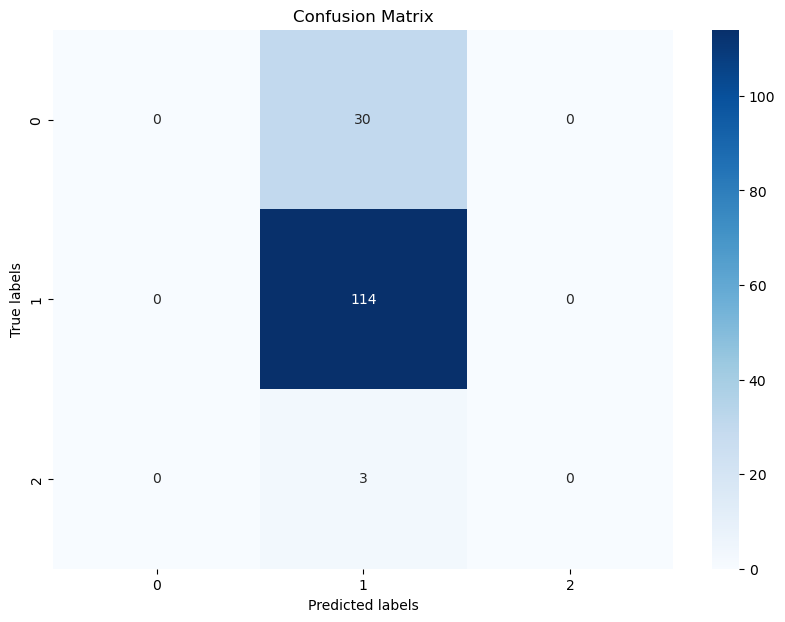

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [116]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.78      1.00      0.87       114
           2       0.00      0.00      0.00         3

    accuracy                           0.78       147
   macro avg       0.26      0.33      0.29       147
weighted avg       0.60      0.78      0.68       147



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.22448979591836735


In [118]:
# Examining incorrect predictions
df_errors = df_copy.loc[y_test.index]  # Use the original df to retain unencoded data
df_errors['Predicted'] = y_pred
incorrect_predictions = df_errors[df_errors['music_effects_encoded'] != df_errors['Predicted']]

print("Sample of Incorrect Predictions:\n", incorrect_predictions.head())

Sample of Incorrect Predictions:
      age primary_streaming_service  hours_per_day while_working  \
33    16                   Spotify              1           Yes   
174   18                   Spotify              2           Yes   
247   20                   Spotify              2            No   
65    24                   Spotify              3            No   
81    22                   Spotify              2           Yes   

    instrumentalist composer  fav_genre exploratory foreign_languages  bpm  \
33               No       No  Classical          No                No   75   
174              No       No        R&B          No               Yes  164   
247             Yes      Yes      Metal          No               Yes  220   
65               No       No       Rock         Yes               Yes  130   
81               No       No      K pop         Yes               Yes  126   

     ... anxiety depression insomnia ocd music_effects  \
33   ...       0          0        0

In [119]:
incorrect_predictions

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,anxiety,depression,insomnia,ocd,music_effects,instrumentalist_encoded,music_effects_encoded,composer_encoded,exploratory_encoded,Predicted
33,16,Spotify,1,Yes,No,No,Classical,No,No,75,...,0,0,0,0,No effect,0,0,0,0,1
174,18,Spotify,2,Yes,No,No,R&B,No,Yes,164,...,5,6,0,1,No effect,0,0,0,0,1
247,20,Spotify,2,No,Yes,Yes,Metal,No,Yes,220,...,0,0,0,1,No effect,1,0,1,0,1
65,24,Spotify,3,No,No,No,Rock,Yes,Yes,130,...,0,0,8,0,No effect,0,0,0,1,1
81,22,Spotify,2,Yes,No,No,K pop,Yes,Yes,126,...,7,8,5,1,No effect,0,0,0,1,1
468,41,Spotify,3,No,No,No,Metal,Yes,Yes,178,...,6,5,4,0,No effect,0,0,0,1,1
10,18,Spotify,3,Yes,Yes,No,Country,Yes,No,120,...,7,7,4,7,No effect,1,0,0,1,1
377,32,Other,3,Yes,Yes,No,Rock,No,Yes,93,...,2,2,8,0,No effect,1,0,0,0,1
665,15,Spotify,3,Yes,Yes,No,Rock,No,No,132,...,4,3,5,0,No effect,1,0,0,0,1
333,40,Spotify,6,Yes,No,No,Rock,Yes,Yes,128,...,10,7,3,3,No effect,0,0,0,1,1


In [120]:
# mord doesn't directly expose coefficients easily; however, we can look at its attributes
print(f'Model coefficients: {model.coef_}')

Model coefficients: [0.39054732 0.17929691 0.37025269]


---------------------------------------------------------------------------------
- **Accuracy:** The model correctly predicted 77.55% of the cases. This is a decent accuracy rate, indicating a relatively high level of correctness in predictions versus actual outcomes. However, the significance of this accuracy also depends on the distribution of the classes in our data.

- **Mean Absolute Error:** On average, the predictions made by the model are off by 0.224 units on the scale used to measure the outcome variable (music_effects_encoded). Given that our outcome variable seems to be ordinal (encoded with values representing ordered categories such as No effect, Improve, Worsen), an MAE of 0.224 suggests that the model predictions are quite close to the actual values, with a small average deviation. This is particularly meaningful in ordered categorical outcomes where the distance between categories is considered.

- **Model coefficient:**
    - Instrumentalist (0.39054732): Being an instrumentalist is associated with an increase in the log-odds of reporting a higher category of music effects by approximately 0.391, compared to non-instrumentalists. This suggests a positive relationship between being an instrumentalist and perceiving more beneficial or intense music effects.
    - Composer (0.17929691): Being a composer is associated with an increase in the log-odds of reporting a higher category of music effects by approximately 0.179, compared to non-composers. This indicates a positive but smaller relationship compared to being an instrumentalist, suggesting that being a composer also relates positively to music effects but to a lesser extent.
    - Exploratory (0.37025269): Having an exploratory attitude towards discovering new artists or genres is associated with an increase in the log-odds of reporting a higher category of music effects by approximately 0.370, hinting at a strong positive relationship similar to instrumentalists. This points to the impactful nature of exploratory behaviors in enhancing respondents' experiences or perceptions of music effects.
The positive coefficients across all variables indicate that engagement in music, whether through playing an instrument, composing, or exploring new music, is positively associated with how individuals perceive the effects of music on their mental health or well-being.

- **33 Incorrect Predictions:** Out of 735 test rows, the model made 33 incorrect predictions


The accuracy and MAE together suggest a model that performs relatively well, with predictions usually close to the actual outcomes. The positive model coefficient signifies an association between being an instrumentalist and experiencing more positive music effects.


--------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Let's try adding the favorite music genre to our predictors, to see if we can get better results.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [97]:
df_copy = df.copy()

In [90]:
# Checking what are the different favorite music genres in our dataset
df_copy['fav_genre'].unique()

array(['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'K pop',
       'Country', 'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal',
       'Folk', 'Lofi', 'Gospel'], dtype=object)

In [99]:
# Encoding the 'fav_genre' ordinal variable
df_copy['fav_genre_encoded'] = df_copy['fav_genre'].map({'Latin': 0, 'Rock': 1, 'Video game music': 2, 'Jazz': 3, 'R&B': 4, 'K pop': 5,
       'Country': 6, 'EDM':7, 'Pop': 8, 'Hip hop': 9, 'Rap': 10, 'Classical': 11, 'Metal': 12, 'Folk': 13, 'Lofi': 14, 'Gospel': 15})


In [101]:
# Adjusting X to include additional predictors
X = df_copy[['instrumentalist_encoded', 'composer_encoded', 'exploratory_encoded', 'fav_genre_encoded']]
y = df_copy['music_effects_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the LogisticAT model as an example (Logistic Regression for All Thresholds)
model = m.LogisticAT(alpha=1.0)  # Alpha is the regularization parameter
model.fit(X_train, y_train)

# Predictions can be made on the test set, and model performance evaluated
y_pred = model.predict(X_test)

In [102]:
# CHecking the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7755102040816326


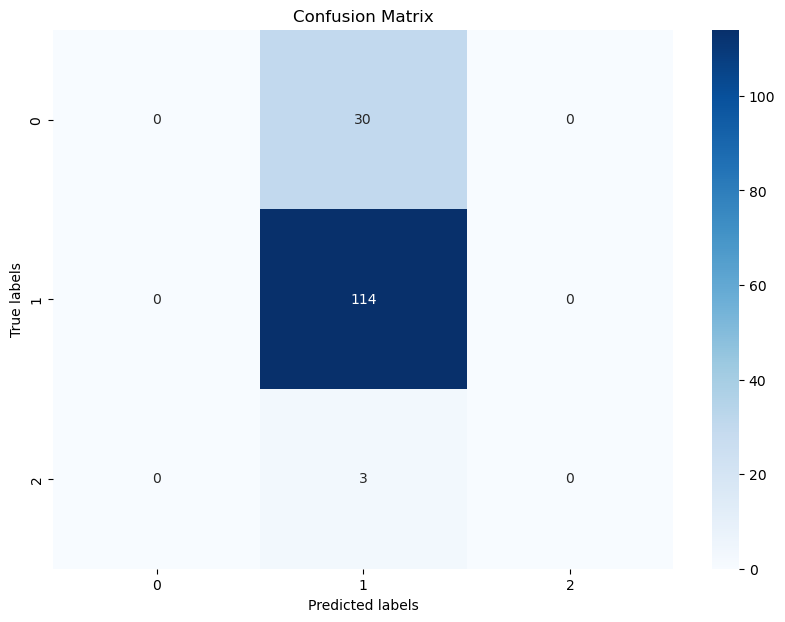

In [103]:
# Printing the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [104]:
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.78      1.00      0.87       114
           2       0.00      0.00      0.00         3

    accuracy                           0.78       147
   macro avg       0.26      0.33      0.29       147
weighted avg       0.60      0.78      0.68       147



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# CHecking the Mean absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.22448979591836735


In [108]:
df_errors = df_copy.loc[y_test.index]  # Use the original df to retain unencoded data
df_errors['Predicted'] = y_pred
incorrect_predictions = df_errors[df_errors['music_effects_encoded'] != df_errors['Predicted']]

print("Sample of Incorrect Predictions:\n", incorrect_predictions.head())

Sample of Incorrect Predictions:
      age primary_streaming_service  hours_per_day while_working  \
33    16                   Spotify              1           Yes   
174   18                   Spotify              2           Yes   
247   20                   Spotify              2            No   
65    24                   Spotify              3            No   
81    22                   Spotify              2           Yes   

    instrumentalist composer  fav_genre exploratory foreign_languages  bpm  \
33               No       No  Classical          No                No   75   
174              No       No        R&B          No               Yes  164   
247             Yes      Yes      Metal          No               Yes  220   
65               No       No       Rock         Yes               Yes  130   
81               No       No      K pop         Yes               Yes  126   

     ... depression insomnia ocd music_effects instrumentalist_encoded  \
33   ...          0 

In [109]:
incorrect_predictions

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,depression,insomnia,ocd,music_effects,instrumentalist_encoded,music_effects_encoded,composer_encoded,exploratory_encoded,fav_genre_encoded,Predicted
33,16,Spotify,1,Yes,No,No,Classical,No,No,75,...,0,0,0,No effect,0,0,0,0,11,1
174,18,Spotify,2,Yes,No,No,R&B,No,Yes,164,...,6,0,1,No effect,0,0,0,0,4,1
247,20,Spotify,2,No,Yes,Yes,Metal,No,Yes,220,...,0,0,1,No effect,1,0,1,0,12,1
65,24,Spotify,3,No,No,No,Rock,Yes,Yes,130,...,0,8,0,No effect,0,0,0,1,1,1
81,22,Spotify,2,Yes,No,No,K pop,Yes,Yes,126,...,8,5,1,No effect,0,0,0,1,5,1
468,41,Spotify,3,No,No,No,Metal,Yes,Yes,178,...,5,4,0,No effect,0,0,0,1,12,1
10,18,Spotify,3,Yes,Yes,No,Country,Yes,No,120,...,7,4,7,No effect,1,0,0,1,6,1
377,32,Other,3,Yes,Yes,No,Rock,No,Yes,93,...,2,8,0,No effect,1,0,0,0,1,1
665,15,Spotify,3,Yes,Yes,No,Rock,No,No,132,...,3,5,0,No effect,1,0,0,0,1,1
333,40,Spotify,6,Yes,No,No,Rock,Yes,Yes,128,...,7,3,3,No effect,0,0,0,1,1,1


In [110]:
# mord doesn't directly expose coefficients easily; however, we can look at its attributes
print(f'Model coefficients: {model.coef_}')

Model coefficients: [0.3890334  0.16308424 0.35494272 0.02869412]


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
With or without favorite music genre as one of our vairable predictors, we get the same Accuracy, Mean Absolute Error and number of incorrect predictions.

So here's what we can conclude from the Model coefficients:

1. Instrumentalist (0.3890334): Individuals identified as instrumentalists have their log-odds of experiencing the predicted music_effect increase by about 0.389 when all other variables are held constant. This suggests a positive relationship between being an instrumentalist and the predicted music effect.

2. Composer (0.16308424): Being a composer is associated with a smaller increase in the log-odds of experiencing the predicted music effect compared to instrumentalists, indicating a positive but weaker relationship.

3. Exploratory (0.35494272): Exhibiting exploratory behavior in music significantly increases the log-odds of the predicted music effect, suggesting a strong positive relationship, somewhat akin to being an instrumentalist.

4. Fav_genre (0.02869412): This shows a very slight positive relationship with the predicted music effect, suggesting that favorite genre has a minimal impact on the outcome.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Machine Learning

#### 3.1 Decision Trees

----------------------------------------------------
We'll be using a decision tree to predict levels of music_effects_encoded based on instrumentalist

------------------------------------------------------

In [121]:
df_copy = df.copy()

In [122]:
# Binary encoding
df_copy['instrumentalist_encoded'] = df_copy['instrumentalist'].map({'Yes': 1, 'No': 0})

# Ordinal encoding
df_copy['music_effects_encoded'] = df_copy['music_effects'].map({'No effect': 0, 'Improve': 1, 'Worsen': 2})

# Encoding the 'composer' binary variable
df_copy['composer_encoded'] = df_copy['composer'].map({'Yes': 1, 'No': 0})

# Encoding the 'exploratory' binary variable
df_copy['exploratory_encoded'] = df_copy['exploratory'].map({'Yes': 1, 'No': 0})

In [123]:
X = df_copy[['instrumentalist_encoded', 'composer_encoded', 'exploratory_encoded']]  # Features
y = df_copy['music_effects_encoded']  # Target

In [124]:
df_copy

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects,instrumentalist_encoded,music_effects_encoded,composer_encoded,exploratory_encoded
0,18,Spotify,3,Yes,Yes,Yes,Latin,Yes,Yes,156,...,Sometimes,3,0,1,0,No effect,1,0,1,1
1,63,Pandora,1,Yes,No,No,Rock,Yes,No,119,...,Rarely,7,2,2,1,No effect,0,0,0,1
2,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Very frequently,7,7,10,2,No effect,0,0,0,0
3,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Never,9,7,3,3,Improve,0,1,1,1
4,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Rarely,7,2,5,9,Improve,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,17,Spotify,2,Yes,Yes,No,Rock,Yes,Yes,120,...,Never,7,6,0,9,Improve,1,1,0,1
731,18,Spotify,1,Yes,Yes,No,Pop,Yes,Yes,160,...,Sometimes,3,2,2,5,Improve,1,1,0,1
732,19,Other,6,Yes,No,Yes,Rap,Yes,No,120,...,Rarely,2,2,2,2,Improve,0,1,1,1
733,19,Spotify,5,Yes,Yes,No,Classical,No,No,170,...,Sometimes,2,3,2,1,Improve,1,1,0,0


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3)  # Limit depth for interpretability
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluating the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7755102040816326
Confusion Matrix:
 [[  0  30   0]
 [  0 114   0]
 [  0   3   0]]


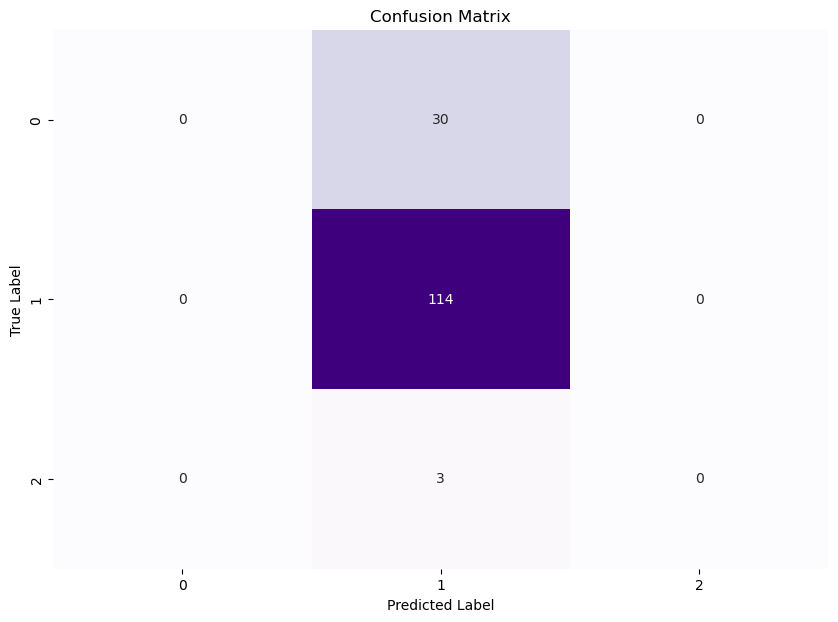

In [133]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- First and Third Rows/Classes (Actual Classes): Both the first and third rows, representing two of the music_effects classes, have all their instances misclassified as the class represented by the middle row. There are no True Positives (correct predictions) for these classes, as indicated by the 0s in the first and third rows' outer columns.

- Second Row/Class (Actual Class): The second row shows that 114 instances of this class are correctly classified (True Positives for this class), as all predictions align with the actual class. However, this row also significantly misclassifies instances from the other two classes into this class, indicating a model bias.

- Off-Diagonal Zeros: The off-diagonal 0s in the first and third columns signify that no instances are predicted in the first and third classes, which is a concern in multiclass classification since it indicates a lack of model sensitivity to these classes.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

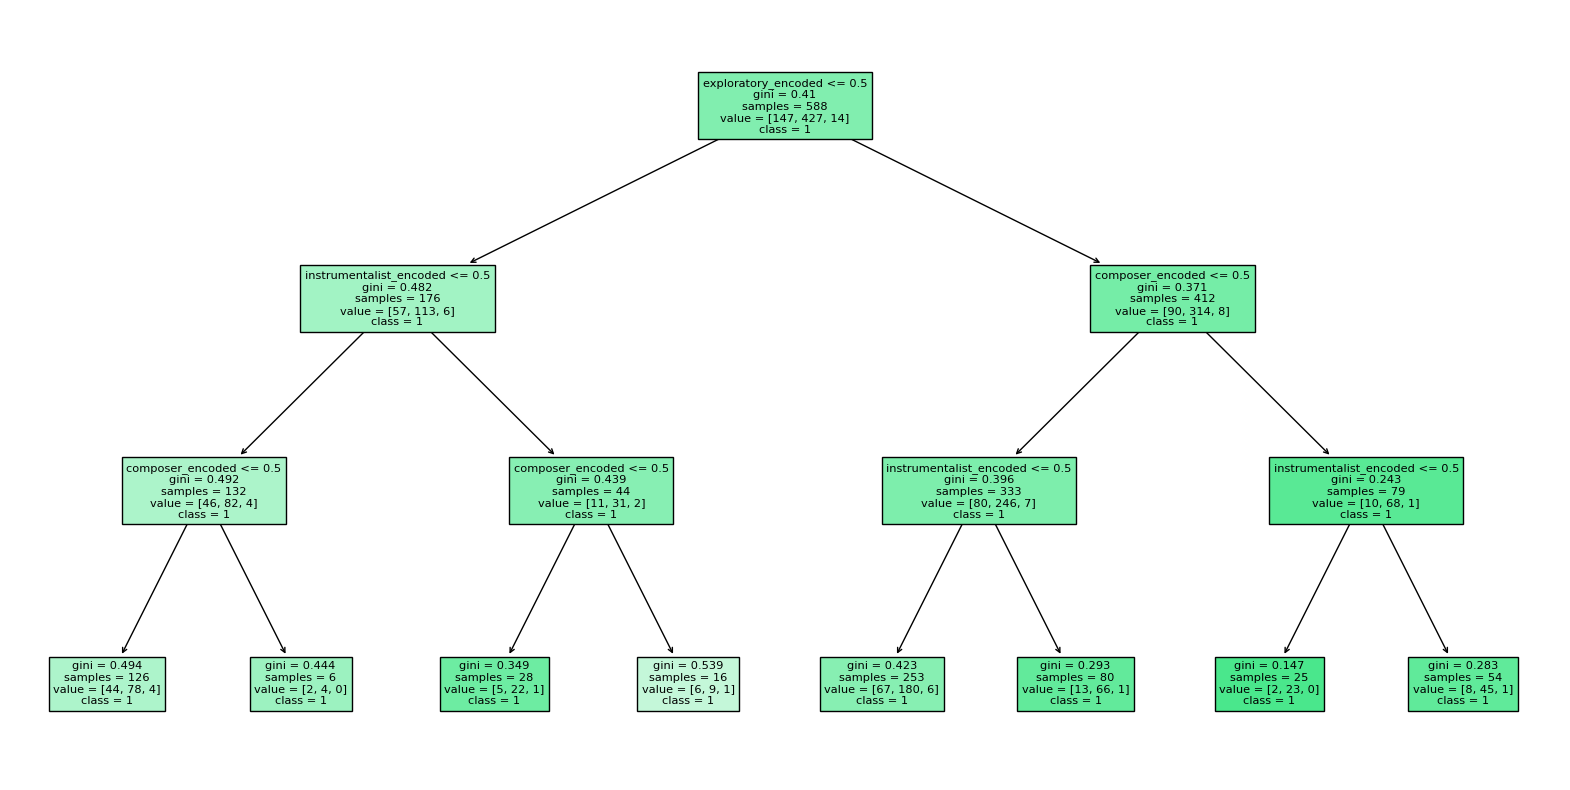

In [88]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=model.classes_.astype(str).tolist())  # Convert to list
plt.show()

----------------------------------------------------------
- The results indicate that about 77.55% of the predictions made by the model match the actual data. 

- Confusion Matrix:
    - First and Third Classes (Top/Bottom Row): The model did not correctly predict any instances of the first and third classes (all entries in the first and last rows are zeros except in the second column). All instances of these classes were incorrectly predicted as belonging to the second class.
    - Second Class (Middle Row): The model correctly predicted all instances of the second class (114 true positives), but also incorrectly classified all instances of the other two classes as belonging to this second class.
    - No True Positives for First and Third Classes: The model appears to always predict the second class, regardless of the actual class, evidenced by zeros in the first and last columns of the confusion matrix.

Conclusion:
A single metric like accuracy can be misleading, and the confusion matrix reveals that the model's seemingly high accuracy is due to its propensity to predict only the most frequent class. Improvement strategies could include rebalancing the dataset, exploring different models, or adjusting the decision threshold to better accommodate minority classes.

------------------------------------------------------------------

#### 3.2 K-nearest neighbor (K-NN)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Since during the Decision Tree we identify that the model's seemingly high accuracy is due to its propensity to predict only the most frequent class, we'll be performing a K-NN which determines the class based on this majority class among its k-nearest neighbors.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Applying the K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Start with k=5, adjust based on validation

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

In [136]:
# Evaluating the Model
# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4897959183673469
Confusion Matrix:
[[10 20  0]
 [52 62  0]
 [ 2  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.33      0.21        30
           1       0.75      0.54      0.63       114
           2       0.00      0.00      0.00         3

    accuracy                           0.49       147
   macro avg       0.30      0.29      0.28       147
weighted avg       0.61      0.49      0.53       147



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- **Accurancy:** he model accurately predicts approximately 48.98% of the outcomes. This suggests that less than half of the model's predictions match the actual data, indicating a performance close to random for a multi-class problem depending on the distribution of classes.

- **Confusion Matrix:** 
    - **First Class (No effect):** The model predicted 10 correctly (true positives for class 'No effect'), but 20 instances were misclassified as class 'Improve'.
    - **Second Class (Improve):** The model predicted 62 correctly, but 52 instances that belong to class 'Improve' were misclassified as class 'No effect'.
    - **Third Class (Worsen):** All instances of class 'Worsen' were misclassified as class 'No effect' or 'Improve'; the model failed to correctly identify any instance of class 'Worsen'.

- **Classification Report:**
    - **Precision:** Indicates the proportion of positive identifications that were actually correct. For class 0, it's 16%, suggesting that when the model predicts class 0, it's correct about 16% of the time. For class 1, 75% precision suggests a higher reliability in predictions.
    - **Recall:** Indicates the proportion of actual positives that were correctly identified. Class 0 had a recall of 33%, meaning it correctly identified 33% of all actual class 0 instances. Class 1 had a recall of 54%.
    - **F1-Score:** The weighted harmonic mean of precision and recall, providing a single score to assess the balance between them. Class 0 has an F1-score of 21%, and class 1 has 63%, indicating a better balance for class 1 than class 0. Class 2 has scores of 0%, indicating that the model entirely fails to predict this class correctly.
    - **Support:** Reflects the true occurrences of each class in the dataset. Class 1 has the most instances, which might contribute to the model's better performance on this class compared to others.

Overall, the accuracy of about 49% and poor F1-scores, especially for classes 0 and 2, indicate the model struggles significantly with correct classifications across the board. It is particularly ineffective at identifying class 2, likely due to it having very few instances (imbalanced classes).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------
Let's try with a different number of Neighbors K.

-----------------------------------------------------------------------------------------------------

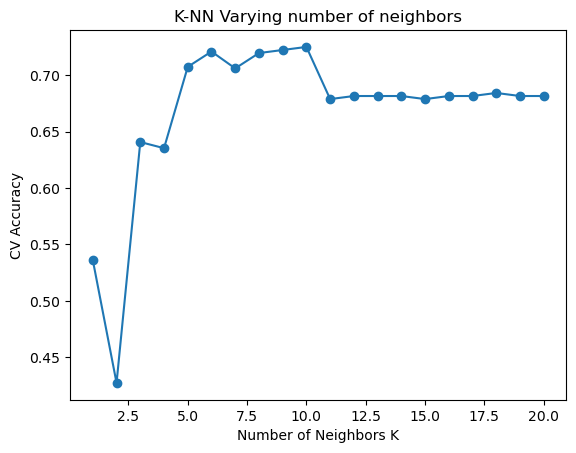

Best k: 10


In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# List to keep track of average cross-validation scores
cv_scores = []

# Test different values of k
for k in range(1, 21):  # Example: testing 1 through 20
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # Using 5-fold cross-validation and accuracy as the metric
    cv_scores.append(scores.mean())

# Determine the best k (n_neighbors)
best_k = range(1, 21)[cv_scores.index(max(cv_scores))]

plt.figure()
plt.plot(range(1, 21), cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.show()

print(f'Best k: {best_k}')

In [138]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # Consider changing the scoring parameter as needed

# Fit on the data
grid_search.fit(X, y)

best_k = grid_search.best_params_['n_neighbors']
print(f'Best n_neighbors: {best_k}')

Best n_neighbors: 10


------------------------------------------------------------------------------------------------------
Both methods above determined **10** as the best alternative, so lets test with that number.

-----------------------------------------------------------------------------------------------------

In [139]:
# Initialize the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=10)  # Trying with 10 this time

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

In [140]:
# Evaluating the Model
# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4897959183673469
Confusion Matrix:
[[10 20  0]
 [52 62  0]
 [ 2  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.33      0.21        30
           1       0.75      0.54      0.63       114
           2       0.00      0.00      0.00         3

    accuracy                           0.49       147
   macro avg       0.30      0.29      0.28       147
weighted avg       0.61      0.49      0.53       147



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------------------------------------------------------------------------------------------------

Adjusting the number of Neighbors did not improve the classification performance, due to the the significant imbalance in class distribution. 

Therefore our next step should be exploring **oversampling** techniques.

-------------------------------------------------------------------------------------------------------------------------------------------------------------

###### 3.2.1 Oversampling with SMOTE

In [141]:
!pip install imbalanced-learn

In [142]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X, y are your features and label

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to generate synthetic samples to balance out the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Re-training the K-NN model with the resampled data
knn = KNeighborsClassifier(n_neighbors=10)  # Adjust based on previous optimum finding
knn.fit(X_train_smote, y_train_smote)

# Making predictions and evaluating the model
y_pred = knn.predict(X_test)
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred))

Accuracy after SMOTE: 0.7755102040816326


In [143]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  0  30   0]
 [  0 114   0]
 [  0   3   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.78      1.00      0.87       114
           2       0.00      0.00      0.00         3

    accuracy                           0.78       147
   macro avg       0.26      0.33      0.29       147
weighted avg       0.60      0.78      0.68       147



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Even though we achieved a much better accuracy, similarly to the Decision tree, the model fails to identify any instances of classes 0 and 2 correctly; it classifies everything as class 1. This is reflected in the precision and recall scores for classes 0 and 2 being 0, indicating the model didn’t make correct predictions for these classes.

 The model demonstrates a bias towards the majority class (1 - Improve). In imbalanced datasets, models might learn to predict solely the majority class as this minimizes overall error, leading to a misleadingly high accuracy.

 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 3.3 Random Forest

-----------------------------------------------------------------------------------------------------------------------------
Let's try now a algorithm more adept at handling class imbalance, such as Random Forests.

---------------------------------------------------------------------------------------------------------------------------

In [144]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the classifier to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

Accuracy: 0.46258503401360546
Confusion Matrix:


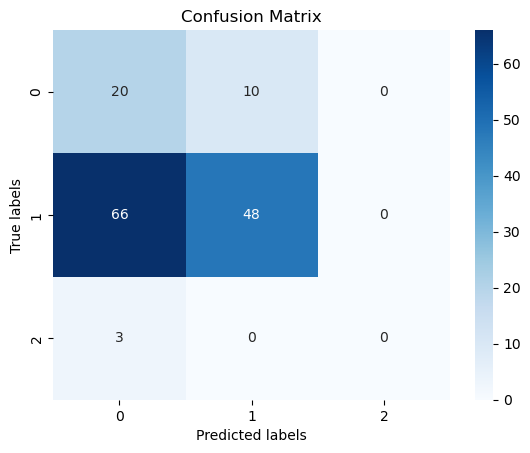

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.67      0.34        30
           1       0.83      0.42      0.56       114
           2       0.00      0.00      0.00         3

    accuracy                           0.46       147
   macro avg       0.35      0.36      0.30       147
weighted avg       0.69      0.46      0.50       147



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
# Evaluating the Model
# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

---------------------------------------------------------------------------------------------------
Again we achieved a low accuracy a 0 correct predictions for class 2 (Worsen).

---------------------------------------------------------------------------------------------------

###### 3.3.1 Oversampling with SMOTE

In [ ]:
# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Applying SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [149]:
# Training the Random Forest Model on Oversampled data
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [151]:
# Evaluating the model
# Predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.35374149659863946
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.83      0.42      0.56       114
           2       0.03      1.00      0.07         3

    accuracy                           0.35       147
   macro avg       0.45      0.48      0.23       147
weighted avg       0.74      0.35      0.45       147



Confusion Matrix:


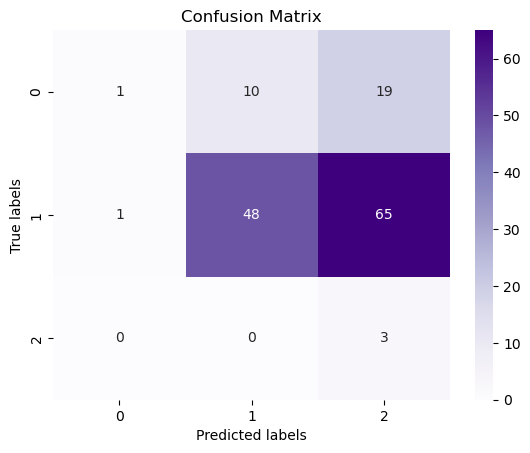

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.83      0.42      0.56       114
           2       0.03      1.00      0.07         3

    accuracy                           0.35       147
   macro avg       0.45      0.48      0.23       147
weighted avg       0.74      0.35      0.45       147



In [152]:
# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

---------------------------------------------------------------------------------------------------
This time we've achieved some correct predictions for class 2 (worsen) however the accuracy is lower.

Therefore, let's try to determine the best hyperparameters for a Random Forest classifier, including n_estimators to improve the performance of the model.

----------------------------------------------------------------------------------------------------------------

In [153]:
# Defining Grid Search Parameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [154]:
# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [156]:
# Perfoming the Grid Search
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [157]:
# Reviewing the results
# Best parameter set found
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best score:", grid_search.best_score_)

# Retrain model with the best parameters found
best_rf = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.7261915109372736


-----------------------------------------------------------------------------------------------------------------------------------------
Let's now apply the above parameters to improve the Random Forest model.

-----------------------------------------------------------------------------------------------------------------------------

Accuracy: 0.35374149659863946
Confusion Matrix:
 [[ 1 10 19]
 [ 1 48 65]
 [ 0  0  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.83      0.42      0.56       114
           2       0.03      1.00      0.07         3

    accuracy                           0.35       147
   macro avg       0.45      0.48      0.23       147
weighted avg       0.74      0.35      0.45       147



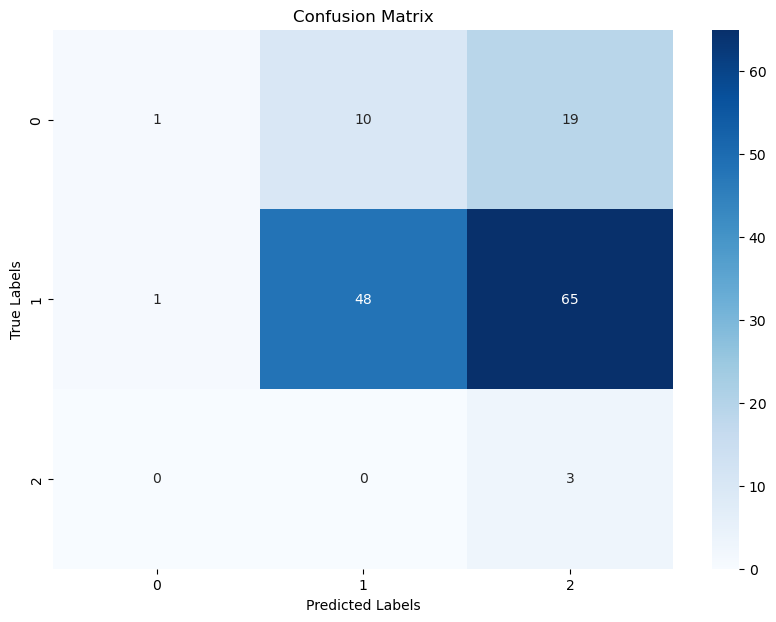

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# `X` and `y` as our features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier with the best parameters found
random_forest = RandomForestClassifier(n_estimators=50,  # Number of trees
                                       max_depth=None,    # Max depth of the trees
                                       min_samples_leaf=1,  # Min number of samples required at a leaf node
                                       min_samples_split=2,  # Min number of samples required to split an internal node
                                       random_state=42)

# Train the model using the resampled training set
random_forest.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)
print('Classification Report:\n', classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------
This time, using the oversampling SMOTE technique and the Grid Search to determine the best parameters to use, we achieve a even lower accurancy and there is a clear struggle in correctly distinguishing among the classes, with a tendency to either overfit class 2 or significantly misclassify between class 0 and class 1.

The model's perfect recall on class 2 indicates it successfully identifies all instances of an evidently minority class but at the cost of high false positives (every instance without class 2 is also being predicted as class 2).

Although class 1 seems to be the majority and the model achieves decent precision here, the overall prediction quality needs improvement given the low accuracy and imbalance in recall and precision across classes.

---------------------------------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Because we very few ocurrences of 'Worsen' Music Effect, we can't accurately predict when music worsens an individul's mental health.

Therefore, we'll now be testing the accuracy of predicting only when music has no effect or when it improves, by removing from our datasets all the ocurrencies of 'Worsen'

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [164]:
df_copy[df_copy['music_effects'] == 'Worsen']

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects,instrumentalist_encoded,music_effects_encoded,composer_encoded,exploratory_encoded
14,17,Spotify,2,No,No,No,Pop,Yes,Yes,121,...,Rarely,7,5,4,1,Worsen,0,2,0,1
63,32,Spotify,5,Yes,No,No,Rock,No,Yes,91,...,Never,10,10,3,1,Worsen,0,2,0,0
126,13,Spotify,2,Yes,Yes,Yes,Rock,Yes,No,120,...,Very frequently,7,10,5,6,Worsen,1,2,1,1
149,21,Spotify,3,Yes,No,No,Pop,Yes,Yes,136,...,Sometimes,6,8,6,0,Worsen,0,2,0,1
243,31,Spotify,1,No,No,No,Rock,No,Yes,132,...,Sometimes,3,10,0,0,Worsen,0,2,0,0
245,17,Spotify,4,No,Yes,No,Classical,Yes,Yes,135,...,Rarely,7,9,2,8,Worsen,1,2,0,1
276,20,Other,1,No,Yes,Yes,Video game music,No,Yes,60,...,Very frequently,8,4,3,3,Worsen,1,2,1,0
336,23,Spotify,2,Yes,No,No,Video game music,Yes,Yes,180,...,Very frequently,10,7,7,3,Worsen,0,2,0,1
437,38,Apple Music,1,Yes,No,No,Video game music,No,No,125,...,Very frequently,5,5,7,1,Worsen,0,2,0,0
441,13,Spotify,6,Yes,No,No,Rap,Yes,No,112,...,Never,4,0,0,2,Worsen,0,2,0,1


In [165]:
# Remove rows where music_effects column is 'Worsen'
df_filtered = df_copy[df_copy['music_effects'] != 'Worsen']
df_filtered

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,freq_video_game_music,anxiety,depression,insomnia,ocd,music_effects,instrumentalist_encoded,music_effects_encoded,composer_encoded,exploratory_encoded
0,18,Spotify,3,Yes,Yes,Yes,Latin,Yes,Yes,156,...,Sometimes,3,0,1,0,No effect,1,0,1,1
1,63,Pandora,1,Yes,No,No,Rock,Yes,No,119,...,Rarely,7,2,2,1,No effect,0,0,0,1
2,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Very frequently,7,7,10,2,No effect,0,0,0,0
3,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Never,9,7,3,3,Improve,0,1,1,1
4,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Rarely,7,2,5,9,Improve,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,17,Spotify,2,Yes,Yes,No,Rock,Yes,Yes,120,...,Never,7,6,0,9,Improve,1,1,0,1
731,18,Spotify,1,Yes,Yes,No,Pop,Yes,Yes,160,...,Sometimes,3,2,2,5,Improve,1,1,0,1
732,19,Other,6,Yes,No,Yes,Rap,Yes,No,120,...,Rarely,2,2,2,2,Improve,0,1,1,1
733,19,Spotify,5,Yes,Yes,No,Classical,No,No,170,...,Sometimes,2,3,2,1,Improve,1,1,0,0


###### Random Forest Model with oversampling and Grid Search parameters

In [166]:
X = df_filtered[['instrumentalist_encoded', 'composer_encoded', 'exploratory_encoded']]  # Features
y = df_filtered['music_effects_encoded']  # Target

In [167]:
# Defining Grid Search Parameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [168]:
# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [169]:
# Perfoming the Grid Search
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [170]:
# Reviewing the results
# Best parameter set found
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best score:", grid_search.best_score_)

# Retrain model with the best parameters found
best_rf = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.7456445461479786


Accuracy: 0.4722222222222222
Confusion Matrix:
 [[24  7]
 [69 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.77      0.39        31
           1       0.86      0.39      0.54       113

    accuracy                           0.47       144
   macro avg       0.56      0.58      0.46       144
weighted avg       0.73      0.47      0.50       144



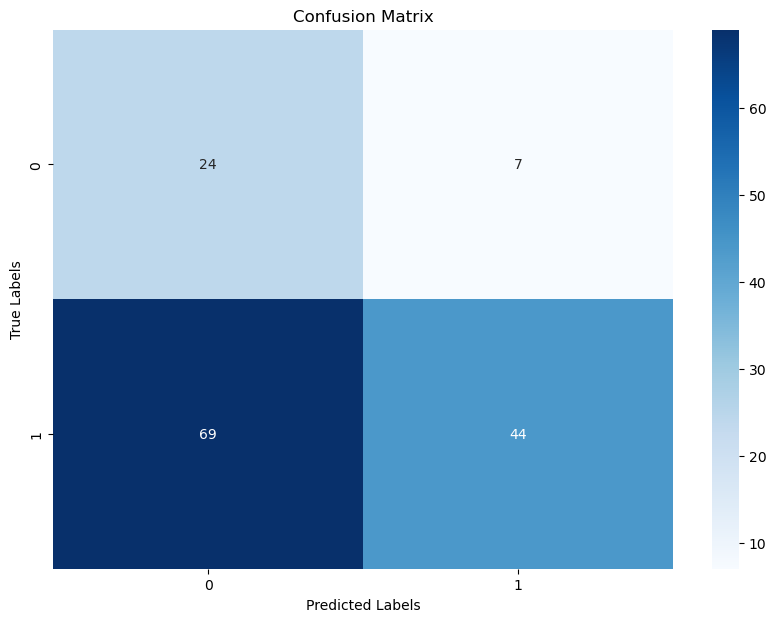

In [171]:

# `X` and `y` as our features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier with the best parameters found
random_forest = RandomForestClassifier(n_estimators=50,  # Number of trees
                                       max_depth=None,    # Max depth of the trees
                                       min_samples_leaf=1,  # Min number of samples required at a leaf node
                                       min_samples_split=2,  # Min number of samples required to split an internal node
                                       random_state=42)

# Train the model using the resampled training set
random_forest.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)
print('Classification Report:\n', classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- **Accuracy:** The model has an accuracy of 47.22%, which means that it correctly predicts the music_effects class nearly half of the time. While better than random guessing in a binary classification, this indicates there is significant room for improvement.

- **Confusion Matrix:** 
    - True Positives (TP) for Class 0: 24 instances where the model correctly predicted class 0.
    - False Negatives (FN) for Class 0: 7 instances where the model incorrectly predicted class 1 when it was actually class 0.
    - False Positives (FP) for Class 0 (or FN for Class 1): 69 instances where the model incorrectly predicted class 0 when it was actually class 1.
    - True Positives (TP) for Class 1: 44 instances where the model correctly predicted class 1.

- **Classification Report:**
    - Class 0 (No Effect):
        - Precision: 26% (Of all predictions for class 0, 26% were correct).
        - Recall: 77% (Of all actual instances of class 0, 77% were correctly identified).
        - F1-Score: 39% (Harmonic mean of precision and recall, indicating balance between them).

    - Class 1 (Improve):
        - Precision: 86% (Of all predictions for class 1, 86% were correct).
        - Recall: 39% (Of all actual instances of class 1, only 39% were correctly identified).
        - F1-Score: 54% (Indicates the model is more precise than it is sensitive for class 1).

Overall, the model appears to be more conservative in predicting class 1, leading to higher precision but significantly lower recall for class 1. This is reflected in the considerable number of false negatives (FN) for class 1. In class 0, the model has a high recall but low precision, indicating it frequently predicts class 0, correctly catching most instances of class 0 but at the cost of many false alarms (FP).

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Without Oversampling:

Accuracy: 0.7847222222222222
Confusion Matrix:
 [[  0  31]
 [  0 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.78      1.00      0.88       113

    accuracy                           0.78       144
   macro avg       0.39      0.50      0.44       144
weighted avg       0.62      0.78      0.69       144



c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mafal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


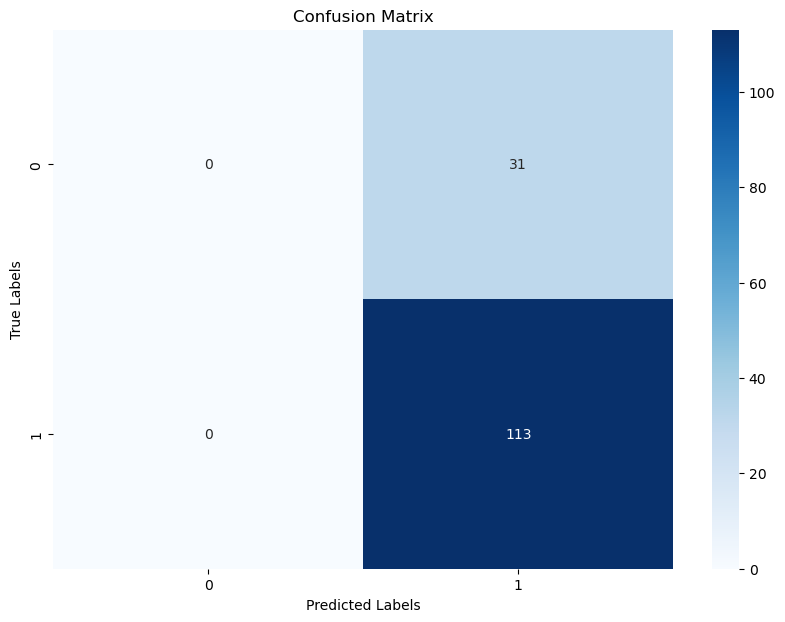

In [172]:

# `X` and `y` as our features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with the best parameters found
random_forest = RandomForestClassifier(n_estimators=50,  # Number of trees
                                       max_depth=None,    # Max depth of the trees
                                       min_samples_leaf=1,  # Min number of samples required at a leaf node
                                       min_samples_split=2,  # Min number of samples required to split an internal node
                                       random_state=42)

# Train the model using the resampled training set
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)
print('Classification Report:\n', classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

--------------------------------------------------------------------------------------------------------------------------
When not oversampling we achieve higher accuracy. However the matrix reveals that all predictions made by the model are for class 1. It correctly identifies all 113 instances of class 1 (True Positives for class 1), but it fails to correctly identify any of the 31 instances of class 0 (True Positives for class 0), marking them all incorrectly as class 1 (False Positives for class 0).

--------------------------------------------------------------------------------------------------------------------------

### Conclusions

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**Model Performance and Class Imbalance:**

- The models tested have shown varying degrees of predictive accuracy, with a notable issue of class imbalance affecting performance—particularly, a tendency to over-predict the majority class while failing to identify the minority class(es) accurately. This suggests that class imbalance is a critical challenge in your dataset that needs addressing for better model performance.

**Statistical Significance vs. Practical Significance:**

- Some variables have shown statistically significant associations with music effects (e.g., being a composer with insomnia scores). However, despite statistical significance, the correlation coefficients indicate weak relationships, suggesting that while these features have a measurable effect, the impact may not be strong or practical enough to base predictions on these features alone.

**Variable Importance:**

- The importance and impact of different features on predicting music effects vary. Being an instrumentalist or engaging in exploratory music behavior appears to have a more substantial association with perceived music effects, based on logistic regression coefficients and the Random Forest model's performance, compared to other variables such as favorite genre.

**Challenges with Multiclass Prediction:**

- When predicting music effects categorized into several classes, the models struggled to effectively differentiate between all classes, particularly the least represented ones. This underlines the difficulties inherent in multiclass classification tasks, especially in the presence of imbalanced data.

**Need for Advanced Techniques:**

- The application of oversampling methods like SMOTE has shown potential for improving model accuracy, yet challenges remain in accurately predicting under-represented classes. Further exploration of advanced resampling techniques, cost-sensitive learning, and ensemble methods might yield more balanced and accurate models.
Further Investigation Required:

The findings suggest areas for further investigation, including the exploration of additional variables that may impact music effects, deeper dives into the reasons behind class imbalance, and the potential for nonlinear relationships that current models may not capture.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------